# P0: Intro

<center><b>Machine Learning Project</b></center>
<br><center><b>Sharif University of Technology - Fall 2023</b></center>

<div style="text-align:justify">Hopefully, the course has been insightful for you till now. This notebook serves as a template for the project which involves training a sentiment analyzer neural network using the comments of a Persian website and fine-tuning it using the comments of another.<br><br>
The first website is Snappfood which is used by the people in Iran to order different kinds of food. The latter is Digikala, an online store for Iranians where people buy many things including smartphones, groceries, cars, and whatever you consider legal. Both websites provide users with ways to express their opinions about the products.<br><br>
A domain shift may be revealed to some degree when switching from Snappfood comments to the ones extracted from Digikala. This will be one of the challenges you will be faced with. So, beware of it!</div>

# P1: Exploring the Datasets (25 points)

Both of the datasets are added to the notebook. In this part, we want to explore their contents. 

Load both of the datasets 

In [1]:
import pandas as pd
digikala_df = pd.read_csv('/kaggle/input/digikala-comments-persian-sentiment-analysis/data.csv')
snappfood_df = pd.read_csv('/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv' , on_bad_lines='skip' , delimiter='\t+')

/tmp/ipykernel_27/4163174911.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  snappfood_df = pd.read_csv('/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv' , on_bad_lines='skip' , delimiter='\t+')


Count the number of comments each dataset contains **(P1-1: 5 points)**

In [2]:
print(len(digikala_df), len(snappfood_df))

3261 70000


In [3]:
snappfood_df.info()
digikala_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   70000 non-null  object
 1   label     70000 non-null  object
 2   label_id  70000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        3261 non-null   object
 1   Score       3261 non-null   int64 
 2   Suggestion  3261 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.6+ KB


Represent the distribution of comments in the Snappfood dataset in terms of being negative or positive **(P1-2: 5 points)**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


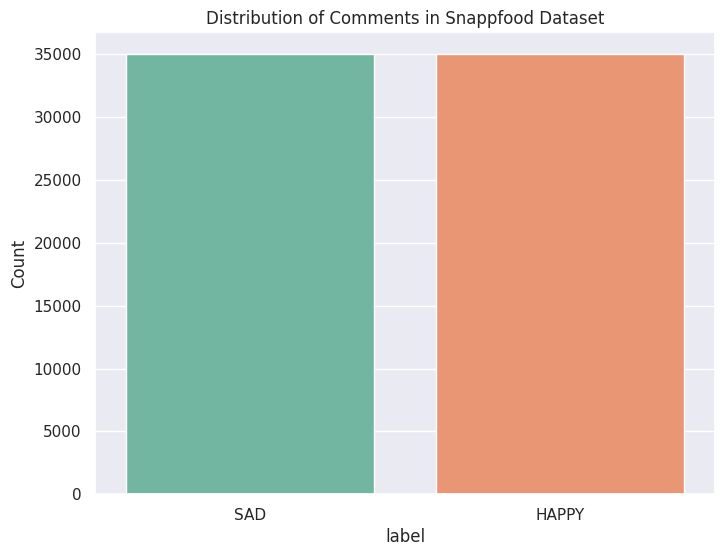

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='label', data=snappfood_df, palette="Set2")
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Distribution of Comments in Snappfood Dataset')
plt.show()

Plot the logarithm of the frequency of words as a function of the logarithm of their rank to demonstrate the Zipf's law. <br>
Note: Don't panic! The Zipf's law can be found here: https://nlp.stanford.edu/IR-book/html/htmledition/zipfs-law-modeling-the-distribution-of-terms-1.html and can be easily understood. **(P1-3: 5 points)**

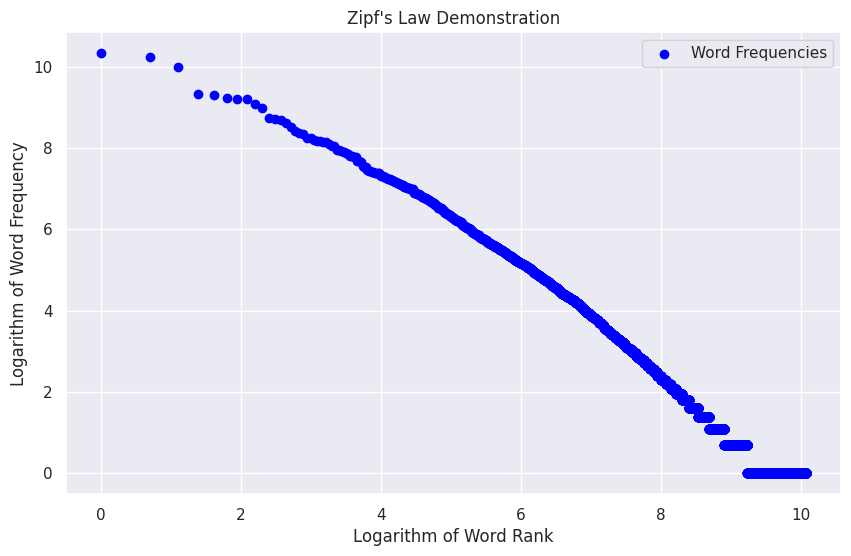

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import numpy as np

positive_comments = snappfood_df[snappfood_df['label'] == 'HAPPY']['comment']

tokens = [word.lower() for comment in positive_comments for word in word_tokenize(comment)]
freq_dist = FreqDist(tokens)
word_freq = list(freq_dist.values())
word_ranks = list(range(1, len(word_freq) + 1))
sorted_indices = np.argsort(word_freq)[::-1]
sorted_word_freq = [word_freq[i] for i in sorted_indices]

log_word_freq = np.log(sorted_word_freq)
log_word_ranks = np.log(word_ranks)

plt.figure(figsize=(10, 6))
plt.scatter(log_word_ranks, log_word_freq, marker='o', color='blue', label='Word Frequencies')
plt.xlabel('Logarithm of Word Rank')
plt.ylabel('Logarithm of Word Frequency')
plt.title('Zipf\'s Law Demonstration')
plt.legend()
plt.show()

Add a new column to the Digikala dataset indicating whether the comment was positive, negative, or neutral. This will be needed later for classification. <br>
Note: This can be done in many ways. You should the appropriate method. **(P1-4: 5 points)**

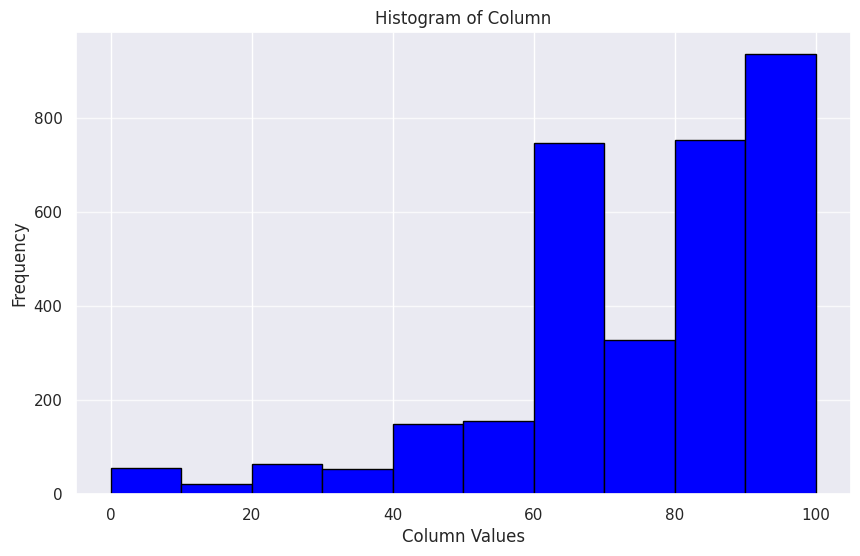

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(digikala_df['Score'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
#60 and 80 or 82 seems reasonable cuts

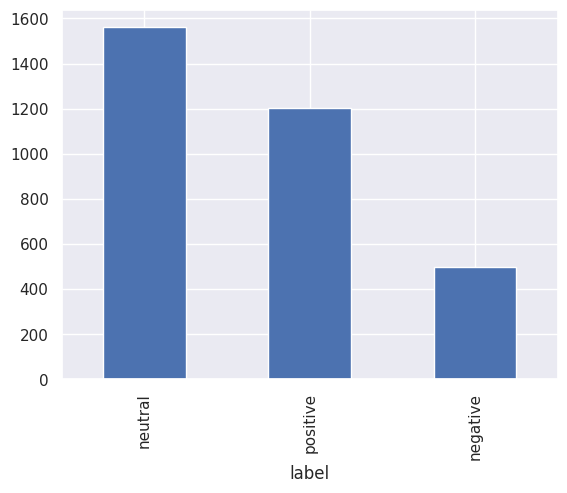

In [8]:
def score2label(x):
    if x > 84:
        return 'positive'
    elif x >= 60:
        return 'neutral'
    else:
        return 'negative'
    
digikala_df['label'] = digikala_df['Score'].apply(score2label)
digikala_df.head(10)

digikala_dist = digikala_df['label'].value_counts()
digikala_dist.plot(kind='bar')
plt.show()

Split each dataset into training, testing, and validation sets. **(P1-5: 5 points)**

In [9]:
from sklearn.model_selection import train_test_split

test_size = 0.2
dig_train, dig_test = train_test_split(digikala_df, test_size=test_size, random_state=42)
dig_test, dig_val = train_test_split(dig_test, test_size=0.5, random_state=42)

snapp_train, snapp_test = train_test_split(snappfood_df, test_size=test_size, random_state=42)
snapp_test, snapp_val = train_test_split(snapp_test, test_size=0.5, random_state=42)
snapp_test.head(10)

,comment,label,label_id
49935,خیلی بی کیفیت بود,SAD,1
63854,زود تحویل داده شد و تازگی و کیفیت مناسبی داشت....,HAPPY,0
2549,به غیر از سوپ بقیه غذاها کیفییت خوبی نداشت مرغ...,SAD,1
56672,غذایش سرد بود دلیل نارضایتی من این بود.,SAD,1
26698,تاریخ مصرف ماست تا سه روز دیگست. متاسفانه اولی...,SAD,1
25803,نون خیلی خشک شده بود,SAD,1
50452,خیلی خوب بود و بسیار با کیفیت بودن,HAPPY,0
8879,سنجد بسیار خشک و مونده بود، خیلی بد و غیر قابل...,HAPPY,0
14514,سر وقت، داغ، خوشمزه؟ موفق باشند,HAPPY,0
11524,لطفا نان رو در بسته بندی مناسبتر ارسال بفرمایی...,HAPPY,0


# P2: Preprocessing and Feature Extraction (20 points)

The goal of this part is to make the Snappfood dataset ready for the neural network to be trained with.<br>
Note: You can use many libraries including `NLTK`, `Spacy`, `Hazm`, `Parsivar`, `Stanza` etc.

Remove the unnecessary characters of the dataset. <br>
**(P2-1: 5 points)**

In [10]:
import re
!pip install hazm
from hazm import Normalizer, word_tokenize, stopwords_list
def replace_re(x):
    persian_pattern = re.compile('[^\sآ-ی]+', re.UNICODE)
    return persian_pattern.sub('', x)

snapp_train['ccomment'] = snapp_train['comment'].apply(replace_re)
snapp_test['ccomment'] = snapp_test['comment'].apply(replace_re)
snapp_val['ccomment'] = snapp_val['comment'].apply(replace_re)

snapp_train.head(10)

  Obtaining dependency information for hazm from https://files.pythonhosted.org/packages/91/8c/cc3d01c27681eb8223781ea162a23f9926647ce864eb601a19aee4bce0af/hazm-0.10.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.2 MB/s eta 0:00:00
  Obtaining dependency information for python-crfsuite<0.10.0,>=0.9.9 from https://files.pythonhosted.org/packages/38/1d/c475ba7d11e9735f00eb08e2f5315aa2e21c24cc85a0474c3fd425edef58/python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all

,comment,label,label_id,ccomment
47339,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...,SAD,1,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...
67456,خوبه فقط حجمش کمه.,HAPPY,0,خوبه فقط حجمش کمه
12308,توی ساندویچ کباب ترکی خیلی غزروف پیدا میشد دست...,SAD,1,توی ساندویچ کباب ترکی خیلی غزروف پیدا میشد دست...
32557,چیز کیک نبود. کیک شکلاتی بود.,HAPPY,0,چیز کیک نبود کیک شکلاتی بود
664,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...,HAPPY,0,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...
21003,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...,HAPPY,0,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...
29637,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...,HAPPY,0,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...
57937,با سلام، کیفیت پیتزا خوب بود ولی حجم چیپس و پن...,SAD,1,با سلام کیفیت پیتزا خوب بود ولی حجم چیپس و پنی...
23680,بی نظیر کیفیت ممتاز قیمت‌ها واقعا عالی بود من ...,HAPPY,0,بی نظیر کیفیت ممتاز قیمتها واقعا عالی بود من ف...
26306,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...,SAD,1,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...


Normalize the dataset. <br>
Note: Check the result. For instance, if you do this correctly, you'll have a dataset containing just 1 type of space. **(P2-2: 5 points)**

In [11]:
nrm = Normalizer()
snapp_train['ccomment'] = snapp_train['ccomment'].apply(nrm.normalize)
snapp_test['ccomment'] = snapp_test['ccomment'].apply(nrm.normalize)
snapp_val['ccomment'] = snapp_val['ccomment'].apply(nrm.normalize)
snapp_train.head(10)

,comment,label,label_id,ccomment
47339,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...,SAD,1,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...
67456,خوبه فقط حجمش کمه.,HAPPY,0,خوبه فقط حجمش کمه
12308,توی ساندویچ کباب ترکی خیلی غزروف پیدا میشد دست...,SAD,1,توی ساندویچ کباب ترکی خیلی غزروف پیدا می‌شد دس...
32557,چیز کیک نبود. کیک شکلاتی بود.,HAPPY,0,چیز کیک نبود کیک شکلاتی بود
664,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...,HAPPY,0,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...
21003,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...,HAPPY,0,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...
29637,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...,HAPPY,0,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...
57937,با سلام، کیفیت پیتزا خوب بود ولی حجم چیپس و پن...,SAD,1,با سلام کیفیت پیتزا خوب بود ولی حجم چیپس و پنی...
23680,بی نظیر کیفیت ممتاز قیمت‌ها واقعا عالی بود من ...,HAPPY,0,بی‌نظیر کیفیت ممتاز قیمتها واقعا عالی بود من ف...
26306,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...,SAD,1,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...


If you want to include other preprocessing steps, put all of your code here.

In [12]:
from hazm import Normalizer, word_tokenize, Lemmatizer, stopwords_list

lemmatizer = Lemmatizer()
stop_words = set(stopwords_list())

def prep(text, lemmatizer, stop_words):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


In [13]:
snapp_train['ccomment'] = snapp_train['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)
snapp_test['ccomment'] = snapp_test['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)
snapp_val['ccomment'] = snapp_val['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)
snapp_train.head(10)

,comment,label,label_id,ccomment
47339,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...,SAD,1,"[اشتباه, میفرستن, کسری, داره, اجناس, واقعا, چق..."
67456,خوبه فقط حجمش کمه.,HAPPY,0,"[خوبه, حجم, کمه]"
12308,توی ساندویچ کباب ترکی خیلی غزروف پیدا میشد دست...,SAD,1,"[توی, ساندویچ, کباب, ترکی, غزروف, دست‌کم, فهمی..."
32557,چیز کیک نبود. کیک شکلاتی بود.,HAPPY,0,"[کیک, کیک, شکلاتی]"
664,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...,HAPPY,0,"[میتون, بگم, #هست, امیدوارم, موند#مون, ممنون]"
21003,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...,HAPPY,0,"[کیفیت, طعم, نون, نسبتا, ارسال, سریع, مشکل, اک..."
29637,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...,HAPPY,0,"[چندین, پیتزا, فیله, گریل, سفارش, داد#ده, واقع..."
57937,با سلام، کیفیت پیتزا خوب بود ولی حجم چیپس و پن...,SAD,1,"[سلام, کیفیت, پیتزا, حجم, چیپس, پنیر, قیمت, وا..."
23680,بی نظیر کیفیت ممتاز قیمت‌ها واقعا عالی بود من ...,HAPPY,0,"[بی‌نظیر, کیفیت, ممتاز, قیمت, واقعا, کرد#کن, گ..."
26306,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...,SAD,1,"[پیتزا, خییل, بد, کیفیت, پایینی, پنیر, داشت#دار]"


In [14]:
def jt(tokens):
    return ' '.join(tokens)
snapp_train['jccomment'] = snapp_train['ccomment'].apply(jt)
snapp_test['jccomment'] = snapp_test['ccomment'].apply(jt)
snapp_val['jccomment'] = snapp_val['ccomment'].apply(jt)
snapp_train.head(10)

,comment,label,label_id,ccomment,jccomment
47339,همیشه یا اشتباه میفرستن یا کسری داره اجناس واق...,SAD,1,"[اشتباه, میفرستن, کسری, داره, اجناس, واقعا, چق...",اشتباه میفرستن کسری داره اجناس واقعا چقدر دقتن
67456,خوبه فقط حجمش کمه.,HAPPY,0,"[خوبه, حجم, کمه]",خوبه حجم کمه
12308,توی ساندویچ کباب ترکی خیلی غزروف پیدا میشد دست...,SAD,1,"[توی, ساندویچ, کباب, ترکی, غزروف, دست‌کم, فهمی...",توی ساندویچ کباب ترکی غزروف دست‌کم فهمید#فهم اورد
32557,چیز کیک نبود. کیک شکلاتی بود.,HAPPY,0,"[کیک, کیک, شکلاتی]",کیک کیک شکلاتی
664,فقط میتونم بگم بهترین هستید و امیدوارم بهترین ...,HAPPY,0,"[میتون, بگم, #هست, امیدوارم, موند#مون, ممنون]",میتون بگم #هست امیدوارم موند#مون ممنون
21003,کیفیت و طعم نون نسبتا خوب بود و ارسال هم سریع ...,HAPPY,0,"[کیفیت, طعم, نون, نسبتا, ارسال, سریع, مشکل, اک...",کیفیت طعم نون نسبتا ارسال سریع مشکل اکثر نون د...
29637,چندین بار پیتزا فیله گریل رو سفارش دادیم و واق...,HAPPY,0,"[چندین, پیتزا, فیله, گریل, سفارش, داد#ده, واقع...",چندین پیتزا فیله گریل سفارش داد#ده واقعا سبک ه...
57937,با سلام، کیفیت پیتزا خوب بود ولی حجم چیپس و پن...,SAD,1,"[سلام, کیفیت, پیتزا, حجم, چیپس, پنیر, قیمت, وا...",سلام کیفیت پیتزا حجم چیپس پنیر قیمت واقعا غذا ...
23680,بی نظیر کیفیت ممتاز قیمت‌ها واقعا عالی بود من ...,HAPPY,0,"[بی‌نظیر, کیفیت, ممتاز, قیمت, واقعا, کرد#کن, گ...",بی‌نظیر کیفیت ممتاز قیمت واقعا کرد#کن گرون این...
26306,پیتزا خییلی بد بود و کیفیت پایینی داشت پنیر هم...,SAD,1,"[پیتزا, خییل, بد, کیفیت, پایینی, پنیر, داشت#دار]",پیتزا خییل بد کیفیت پایینی پنیر داشت#دار


Extract features from the Snappfood dataset
<br> Note: You should use both of the following methods, and compare the results at the end.
- Method 1 (Classic): Use `CountVectorizer` or `TF-IDF`.
- Method 2 (Modern): Use `Word2Vec`, `FastText`, `GloVe`, `Doc2Vec` or train your own `Embedding` Layer. 

If you choose to train your own `Embedding`s, you'll just need to specify an ID for each word remaining in your dataset. **(P2-3: 10 points)**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
max_features = 300
vectorizer = CountVectorizer(max_features = max_features)
snapp_cnt_train = vectorizer.fit_transform(snapp_train['jccomment'])
snapp_cnt_val = vectorizer.transform(snapp_val['jccomment'])
snapp_cnt_test = vectorizer.transform(snapp_test['jccomment'])
snapp_cnt_train.toarray().shape

(56000, 300)

In [16]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

w2v = Word2Vec(sentences = snapp_train['ccomment'], vector_size = max_features, window=5, min_count=1, workers=4)

def gcv(token_list, word_embedding_model):
    word_vectors = [word_embedding_model.wv[word] for word in token_list if word in word_embedding_model.wv]
    if not word_vectors:
        return np.zeros(word_embedding_model.vector_size)
    return np.mean(word_vectors, axis=0)

snapp_wv_train = np.array([gcv(words, w2v) for words in snapp_train['ccomment']])
snapp_wv_val = np.array([gcv(words, w2v) for words in snapp_val['ccomment']])
snapp_wv_test = np.array([gcv(words, w2v) for words in snapp_test['ccomment']])

In [17]:
snapp_wv_train.shape

(56000, 300)

In [18]:
dig_train['ccomment'] = dig_train['Text'].apply(replace_re)
dig_test['ccomment'] = dig_test['Text'].apply(replace_re)
dig_val['ccomment'] = dig_val['Text'].apply(replace_re)

dig_train['ccomment'] = dig_train['ccomment'].apply(nrm.normalize)
dig_test['ccomment'] = dig_test['ccomment'].apply(nrm.normalize)
dig_val['ccomment'] = dig_val['ccomment'].apply(nrm.normalize)

dig_train['ccomment'] = dig_train['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)
dig_test['ccomment'] = dig_test['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)
dig_val['ccomment'] = dig_val['ccomment'].apply(prep, lemmatizer=lemmatizer, stop_words=stop_words)

dig_train['jccomment'] = dig_train['ccomment'].apply(jt)
dig_test['jccomment'] = dig_test['ccomment'].apply(jt)
dig_val['jccomment'] = dig_val['ccomment'].apply(jt)


In [19]:
dig_train

,Text,Score,Suggestion,label,ccomment,jccomment
997,واقعا عالی بوی خوبی داره تمیز کنندگی چشم گ...,88,1,positive,"[واقعا, بوی, داره, تمیز, کنندگی, چشم, داره, چر...",واقعا بوی داره تمیز کنندگی چشم داره چربی پوست ...
2952,من از این مته ها استفاده کردم براى سنگ دیوار ح...,88,1,positive,"[مته, استفاده, سنگ, دیوار, حرف, نداره, استیل, ...",مته استفاده سنگ دیوار حرف نداره استیل سوراخ میکنه
3117,این همزن را هفته پیش گرفتم ساخت اسلوونى است و...,96,1,positive,"[همزن, هفته, گرفت#گیر, ساخت, اسلوونی, کیف, ساخ...",همزن هفته گرفت#گیر ساخت اسلوونی کیف ساخت توجه ...
1451,عالیه این بهترین چیزی بوده که تا به حال از ای...,60,1,neutral,"[عالیه, خرید#خر, واقعا, عالیه, خرید#خر, راض]",عالیه خرید#خر واقعا عالیه خرید#خر راض
2849,کیفیت خیلی خوب,100,1,positive,[کیفیت],کیفیت
...,...,...,...,...,...,...
1095,کلا مارک میبلین محصولات خوبی داره اگه اصل باش...,72,1,neutral,"[کلا, مارک, میبلین, محصولات, داره, اگه, اصل, ب...",کلا مارک میبلین محصولات داره اگه اصل باشه کرم ...
1130,درود حدود دو سه ماهی است ازش استفاده میکنم بر...,84,2,neutral,"[درود, ماهی, ازش, استفاده, چاقوی, دم, دستی, آش...",درود ماهی ازش استفاده چاقوی دم دستی آشپزخانه د...
1294,خوشگله و قیمتش هم از بیرون کمتره و صفحه اش شفا...,92,1,positive,"[خوشگله, قیمت, کمتره, صفحه, شفافه, اگه, رنگ, م...",خوشگله قیمت کمتره صفحه شفافه اگه رنگ میز مثلا ...
860,از تلویزیون راضی هستم ولی اینکه بعد از 6 ماه پ...,88,1,positive,"[تلویزیون, راضی, #هست, ماه, پنل, تصویر, نقص, پ...",تلویزیون راضی #هست ماه پنل تصویر نقص پرش تصویر...


# P3: Training and Initial Evaluation (20 points)

Define an architecture for your neural network. **(P3-1: 5 points)**

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

def builder():
    model = Sequential()
    model.add(LSTM(64, input_shape=(max_features, 1), return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model



**I increased the last layer width to improve fine tuning the model at the last part.**

                      

In [21]:
# tf.keras.backend.clear_session()

Train the network on the Snappfood dataset, while monitoring its performance on the validation set. **(P3-2: 5 points)**

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_cnt = builder()
history = model_cnt.fit(snapp_cnt_train.toarray(), snapp_train['label_id'],
                    epochs=20,
                    batch_size=32,
                    validation_data=(snapp_cnt_val.toarray(), snapp_val['label_id']),
                    callbacks=[early_stopping])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 64)           16896     
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 64)                1228864   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1249985 (4.77 MB)
Trainable params: 1249985 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1750/17

Evaluate the performance of your network on the Snappfood testing set. **(P3-3: 5 points)**

In [23]:
test_loss, test_accuracy = model_cnt.evaluate(snapp_cnt_test.toarray(), snapp_test['label_id'])
print(test_loss, test_accuracy)

219/219 [==============================] - 1s 5ms/step - loss: 0.4250 - accuracy: 0.8066
0.4250057637691498 0.8065714240074158


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_wv = builder()
history = model_wv.fit(snapp_wv_train, snapp_train['label_id'],
                    epochs=10,
                    batch_size=32,
                    validation_data=(snapp_wv_val, snapp_val['label_id']),
                    callbacks=[early_stopping])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 300, 64)           16896     
                                                                 
 flatten_1 (Flatten)         (None, 19200)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1228864   
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1249985 (4.77 MB)
Trainable params: 1249985 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1750/

In [25]:
test_loss, test_accuracy = model_wv.evaluate(snapp_wv_test, snapp_test['label_id'])
print(test_loss, test_accuracy)

219/219 [==============================] - 1s 5ms/step - loss: 0.4311 - accuracy: 0.8010
0.4310970604419708 0.8009999990463257


Save the weights of the neural network and its architecture seperately in the notebook's output folder (`/kaggle/working/`). **(P3-4: 5 points)**

In [26]:
import os
import tensorflow as tf

def saviour(model, extend):
    output_folder = '/kaggle/working/'

    # Save model architecture as JSON
    model_architecture_path = os.path.join(output_folder, str(extend+'model_architecture.json'))
    model_json = model.to_json()
    with open(model_architecture_path, 'w') as json_file:
        json_file.write(model_json)

    # Save model weights
    model_weights_path = os.path.join(output_folder, str(extend+'model_weights.h5'))
    model.save_weights(model_weights_path)

In [27]:
saviour(model_cnt, 'cnt_')
saviour(model_wv, 'wv_')

# P4: Fine-tuning and Evaluation (35 points)

In this part, we will fine-tune the previously trained network on the comments extracted from Digikala.

Load the neural network along with its weights **(P4-1: 5 points)**

In [28]:
model_architecture_path = '/kaggle/working/cnt_model_architecture.json'
model_weights_path = '/kaggle/working/cnt_model_weights.h5'

with open(model_architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()
snapp_cnt_model = tf.keras.models.model_from_json(loaded_model_json)

snapp_cnt_model.load_weights(model_weights_path)

Change the architecture of the network (the last layer) to make it appropriate for classifying the sentiment of a comment in one of the previously mentioned three classes: positive, negative, or neutral. **(P4-2: 5 points)**

In [29]:
num_classes = 3 
snapp_cnt_model.pop()
snapp_cnt_model.add(layers.Dense(num_classes, activation='softmax'))

Extract features from the Digikala dataset.<br>
Note: Pay attention to the fact that your features are the same as the ones you extracted from the Snappfood dataset. You just need to use the same method for the new dataset. For instance, if you consider the `CountVectorizer` as your feature extractor, the set of the words for which you'll count the frequency will not change! **(P4-3: 15 points)**

In [30]:
dig_cnt_train = vectorizer.transform(dig_train['jccomment']).toarray()
dig_cnt_val = vectorizer.transform(dig_val['jccomment']).toarray()
dig_cnt_test = vectorizer.transform(dig_test['jccomment']).toarray()

y_dig_train = pd.get_dummies(dig_train['label'], dtype=int).values
y_dig_val = pd.get_dummies(dig_val['label'], dtype=int).values
y_dig_test = pd.get_dummies(dig_test['label'], dtype=int).values
y_dig_train[5:20]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

Fine-tune the network on the training set associated with the Digikala dataset, while monitoring its performance on the corresponding validation set.<br>
Note: The process of fine-tuning should follow one of these methods:
- Method 1: Fix the weights for all layers expect the last one.
- Method 2: Use a really small learning rate for all layers except the last one.

**(P4-4: 5 points)**

In [31]:
from tensorflow.keras.optimizers import Adam

for l in snapp_cnt_model.layers[:-1]:
    l.trainable = True
    l.optimizer = Adam(1e-4)
    
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
snapp_cnt_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = snapp_cnt_model.fit(dig_cnt_train, y_dig_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(dig_cnt_val, y_dig_val),
                    callbacks=[early_stopping])


Epoch 1/10
82/82 [==============================] - 4s 19ms/step - loss: 1.0146 - accuracy: 0.4582 - val_loss: 0.9656 - val_accuracy: 0.5046
Epoch 2/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9221 - accuracy: 0.5291 - val_loss: 0.9617 - val_accuracy: 0.5168
Epoch 3/10
82/82 [==============================] - 1s 11ms/step - loss: 0.8709 - accuracy: 0.5801 - val_loss: 0.9685 - val_accuracy: 0.5321
Epoch 4/10
82/82 [==============================] - 1s 11ms/step - loss: 0.7982 - accuracy: 0.6258 - val_loss: 0.9870 - val_accuracy: 0.5321
Epoch 5/10
82/82 [==============================] - 1s 11ms/step - loss: 0.7138 - accuracy: 0.6794 - val_loss: 1.0204 - val_accuracy: 0.4862


Evaluate the performance of the neural network on the testing set you have extracted from the Digikala dataset. **(P4-5: 5 points)**

In [32]:
test_loss, test_accuracy = snapp_cnt_model.evaluate(dig_cnt_test, y_dig_test)
print(test_loss, test_accuracy)

11/11 [==============================] - 0s 10ms/step - loss: 0.9503 - accuracy: 0.5184
0.9503496885299683 0.5184049010276794


In [33]:
model_architecture_path = '/kaggle/working/wv_model_architecture.json'
model_weights_path = '/kaggle/working/wv_model_weights.h5'

with open(model_architecture_path, 'r') as json_file:
    loaded_model_json = json_file.read()
snapp_wv_model = tf.keras.models.model_from_json(loaded_model_json)

snapp_wv_model.load_weights(model_weights_path)

num_classes = 3 
snapp_wv_model.pop()
snapp_wv_model.add(layers.Dense(num_classes, activation='softmax'))

In [34]:
dig_wv_train = np.array([gcv(words, w2v) for words in dig_train['ccomment']])
dig_wv_val = np.array([gcv(words, w2v) for words in dig_val['ccomment']])
dig_wv_test = np.array([gcv(words, w2v) for words in dig_test['ccomment']])

In [35]:
from tensorflow.keras.optimizers import Adam

for l in snapp_cnt_model.layers[:-1]:
    l.trainable = True
    l.optimizer = Adam(1e-4)
    
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
snapp_cnt_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = snapp_cnt_model.fit(dig_wv_train, y_dig_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(dig_wv_val, y_dig_val),
                    callbacks=[early_stopping])


Epoch 1/10
82/82 [==============================] - 4s 19ms/step - loss: 1.0107 - accuracy: 0.4778 - val_loss: 0.9930 - val_accuracy: 0.4832
Epoch 2/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9777 - accuracy: 0.4969 - val_loss: 0.9743 - val_accuracy: 0.5352
Epoch 3/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9688 - accuracy: 0.4919 - val_loss: 0.9625 - val_accuracy: 0.5291
Epoch 4/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9623 - accuracy: 0.5031 - val_loss: 0.9651 - val_accuracy: 0.4832
Epoch 5/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9531 - accuracy: 0.5035 - val_loss: 0.9680 - val_accuracy: 0.4893
Epoch 6/10
82/82 [==============================] - 1s 11ms/step - loss: 0.9529 - accuracy: 0.5069 - val_loss: 0.9515 - val_accuracy: 0.5260
Epoch 7/10
82/82 [==============================] - 1s 12ms/step - loss: 0.9389 - accuracy: 0.5096 - val_loss: 0.9530 - val_accuracy: 0.5107
Epoch 8/10
82

In [36]:
test_loss, test_accuracy = snapp_cnt_model.evaluate(dig_wv_test, y_dig_test)
print(test_loss, test_accuracy)

11/11 [==============================] - 0s 6ms/step - loss: 0.9848 - accuracy: 0.4785
0.9847779870033264 0.47852760553359985
